# SI 618 WN 2018 Homework 2: Improving an existing Jupyter notebook

## Submission Instructions:
Please turn in this Jupyter notebook file (both .ipynb and .html formats) on Canvas.

### Name:  Raphael Ku
### Uniqname: rapku
### People you worked with: I worked by myself

## Objectives:
* gain experience using Kaggle
* apply your knowledge of pandas to improve existing code


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # for tokenization
from collections import Counter
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('../HW2'))

# from subprocess import check_output
# print(check_output(["ls", "../HW2"]).decode("utf8"))
import seaborn as sns
# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Netflix Shows.csv', 'netflix-RAPKU.ipynb']


In [2]:
sns.set_palette('Set3', 10)
sns.set_context('talk')
movie=pd.read_csv('../HW2/Netflix Shows.csv',encoding='cp437')
movie.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


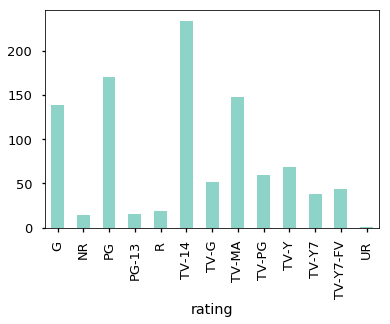

In [3]:
movie.groupby(['rating']).size().plot(kind='bar')

In [4]:
movie=movie.fillna(value=0,axis=1)
movie=movie[movie['rating']!='UR']
movie.groupby('rating')['user rating score'].mean().sort_values()

rating
NR          24.857143
TV-Y7       27.236842
TV-Y7-FV    27.386364
TV-Y        27.794118
G           31.905797
TV-G        34.384615
R           41.263158
PG-13       54.266667
TV-MA       57.418919
PG          60.341176
TV-PG       61.118644
TV-14       69.435897
Name: user rating score, dtype: float64

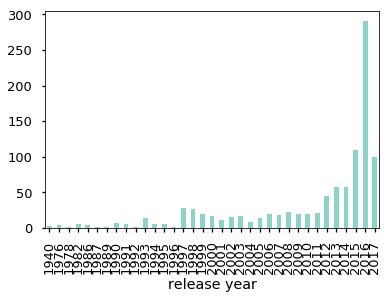

In [5]:
movie.groupby(['release year']).size().plot(kind='bar')

Text(0.5,1,'Average scores of shows')

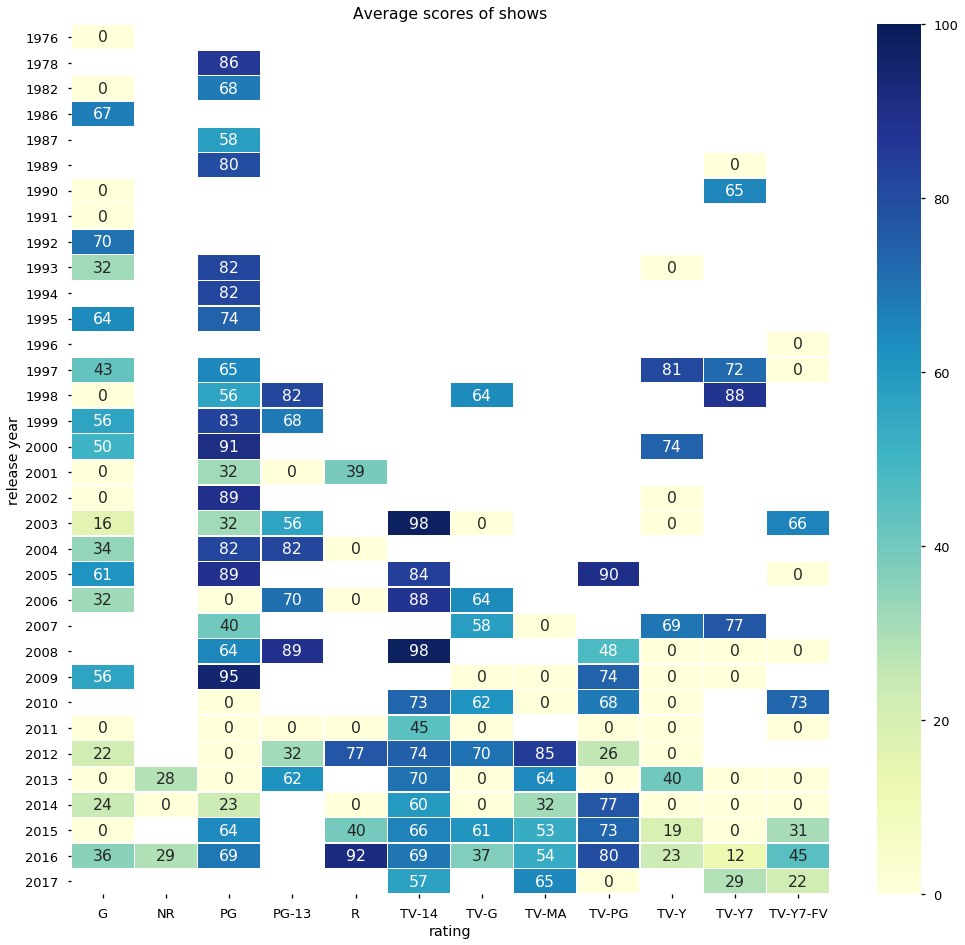

In [6]:
movie=movie[movie['release year']>1940]
score=movie.groupby('rating')['rating']
score_counts=score.count()
movie_genre= movie[movie.rating.isin(score_counts.keys())]
table_score = pd.pivot_table(movie_genre ,values=['user rating score'],index=['release year'],columns=['rating'],aggfunc='mean',margins=False)
table_count=pd.pivot_table(movie_genre,values=['user rating score'],index=['release year'],columns=['rating'],aggfunc='count',margins=False)
plt.figure(figsize=(17,16))
sns.heatmap(table_score['user rating score'],linewidths=.5,annot=True,vmin=0,vmax=100,cmap='YlGnBu')
plt.title('Average scores of shows')

Text(0.5,1,'Count of shows')

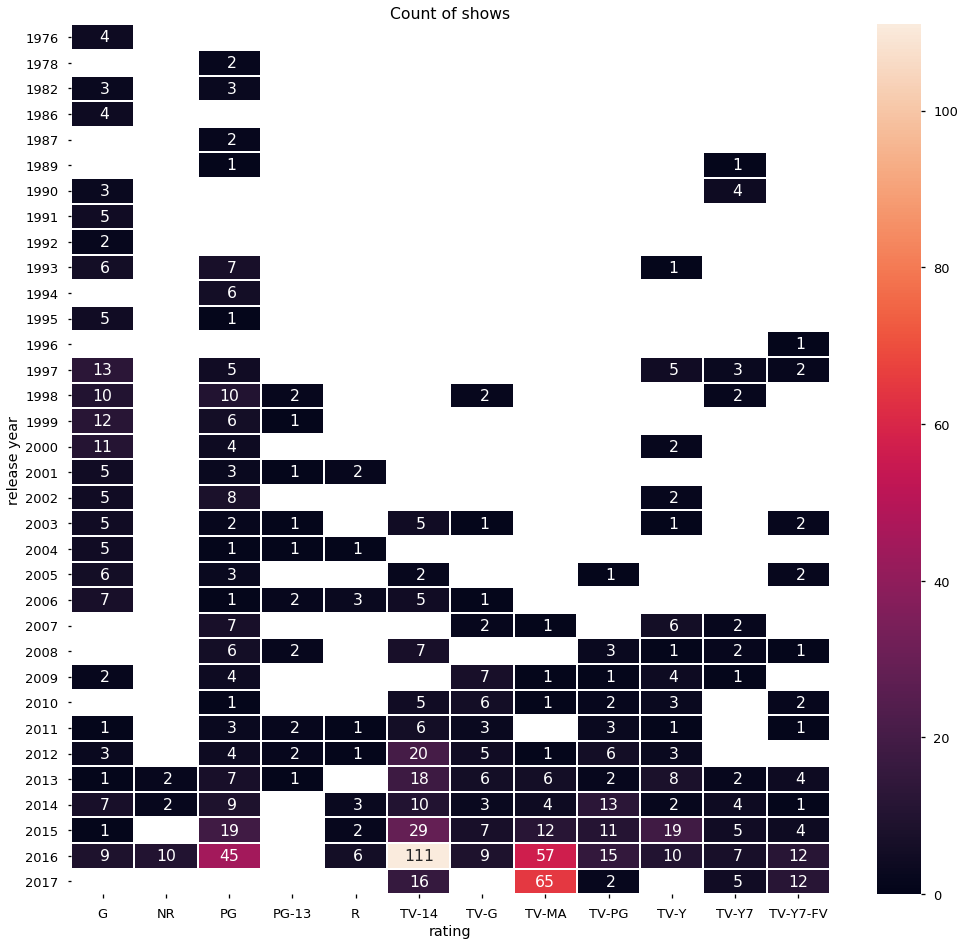

In [7]:
plt.figure(figsize=(17,16))
sns.heatmap(table_count['user rating score'],linewidths=1,annot=True,fmt='2.0f',vmin=0)
plt.title('Count of shows')

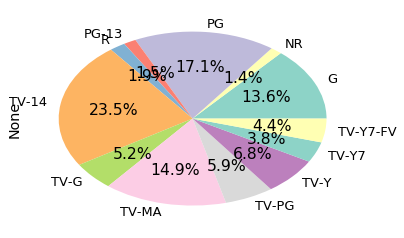

In [8]:
movie.groupby(['rating']).size().plot(kind='pie',autopct='%1.1f%%')

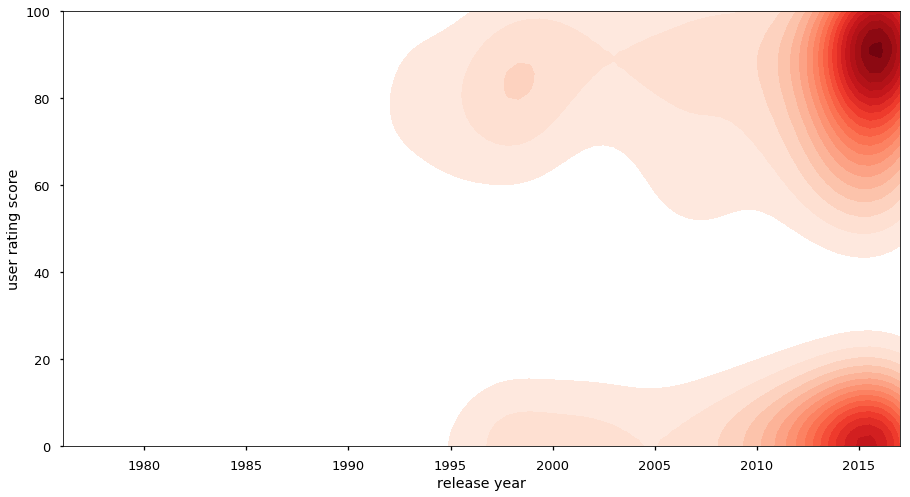

In [9]:
plt.figure(figsize=(15,8))
plt.xlim(1976,2017)
plt.ylim(0,100)
sns.kdeplot(movie['release year'], movie['user rating score'], n_levels=20, cmap="Reds", shade=True, shade_lowest=False)

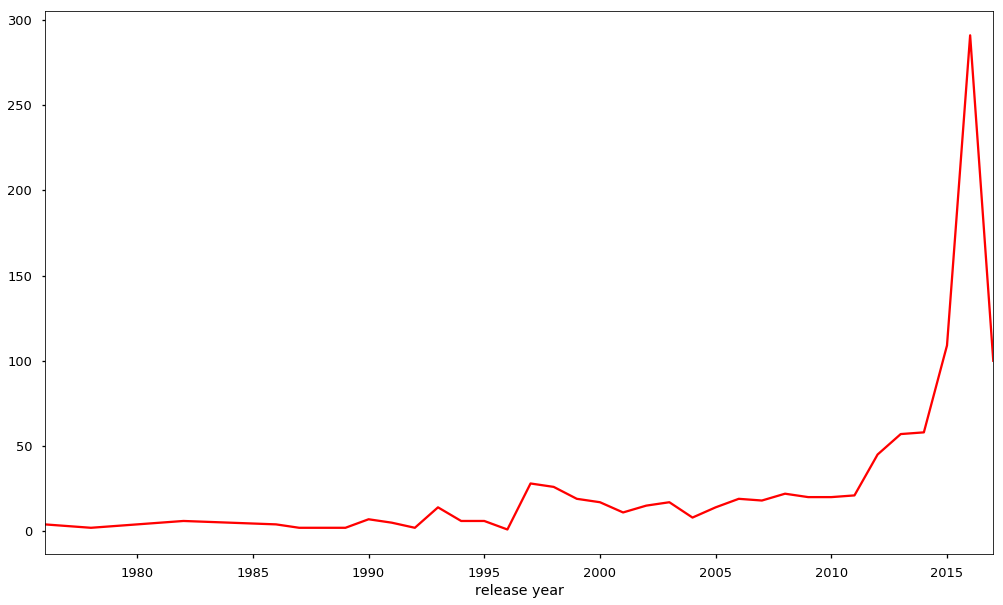

In [10]:
table = movie.groupby('release year').size()
f,ax = plt.subplots(1,1,figsize=(17,10))
table.plot(ax=ax,c='red')

## Portion below added by Raphael Ku

In [11]:
fullmovie = pd.read_csv('../HW2/Netflix Shows.csv',encoding='cp437').fillna(value=0,axis=1)

### Enhancement #1

#### Question: Looking through the raw data, I noticed several duplicated entries. How can I clean up the data to only focus on unique titles?

##### Note: All enhancements after Enhancement #1 will be referencing the cleaned data rather than the original

In [12]:
cmovie = fullmovie.copy()
cmovie = cmovie[cmovie.title.duplicated() == False]
cmovie

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,0.0,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,95.0,80
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110,2013,97.0,80
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2017,91.0,80
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110,2015,98.0,80
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80


In [13]:
print('Original dataset contained {} entries.'.format(len(fullmovie)), \
      'After removing duplicates, the cleaned dataset contains {} entries.\n'.format(len(cmovie)), \
      'Total reduction of {} entries'.format(len(fullmovie)-len(cmovie)))

Original dataset contained 1000 entries. After removing duplicates, the cleaned dataset contains 496 entries.
 Total reduction of 504 entries


### Enhancement #2

#### Question: After cleaning up the data, will the average user score for each rating change significantly?

In [14]:
omovie = fullmovie[fullmovie['rating']!='UR']
#Edited original calculation method to remove 0's in mean calculation
filtered_origmovie = omovie[omovie['user rating score'] != 0] 

ratingorig = omovie.groupby('rating')['user rating score'].mean().sort_values()
ratingorigfiltered = filtered_origmovie.groupby('rating')['user rating score'].mean().sort_values()

In [15]:
#Cleaned dataset, no 0's in mean calculation
fixedmovie= cmovie[cmovie['rating']!='UR']
fixedmovie = fixedmovie[fixedmovie['user rating score'] != 0]
ratingfixed = fixedmovie.groupby('rating')['user rating score'].mean().sort_values()

In [16]:
ratingfixed - ratingorigfiltered

rating
G           -2.824561
NR         -10.000000
PG          -2.222957
PG-13       -2.555556
R           -1.825397
TV-14       -3.555402
TV-G        -0.136364
TV-MA       -3.695833
TV-PG       -2.507143
TV-Y        -0.600000
TV-Y7        2.571429
TV-Y7-FV    -2.562500
Name: user rating score, dtype: float64

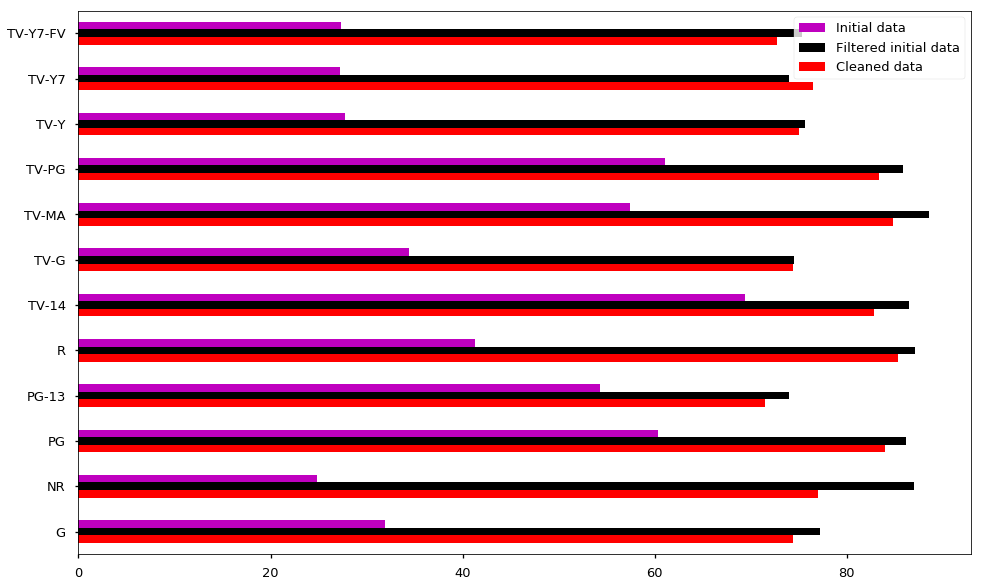

In [17]:
pd.DataFrame({
    'Initial data': ratingorig,
    'Filtered initial data' : ratingorigfiltered, 
    'Cleaned data' : ratingfixed
}).plot.barh(color='rkm', figsize=(16,10), legend='reverse')

### Enhancement #3
#### Question: Can I break down the graph presented on Netflix programs broken down per release year, to reflect the difference in number of movies and TV shows in Netflix?

##### Note: Changed release year groupings from every year to every 5 years, to improve readability

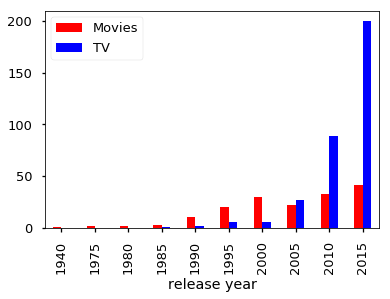

In [18]:
tvnetflix = cmovie[cmovie.rating.str.contains('TV') == True].groupby(cmovie['release year'] // 5 * 5).size()
movienetflix = cmovie[cmovie.rating.str.contains('TV') == False].groupby(cmovie['release year'] // 5 * 5).size()
tv_vs_movie = pd.DataFrame({'TV' : tvnetflix, 'Movies' : movienetflix})
tv_vs_movie.plot.bar(color='rb')

### Enhancement #4

#### Question: The rating description seems to provide some information regarding content. Can I use it to find for all Netflix programs with violence indicated in the rating description? A combination of violence and rude humor?

In [19]:
violent = cmovie[cmovie.ratingLevel.str.contains('violence') == True]
violent.groupby('release year')['title'].value_counts()

release year  title                                               
1982          Annie                                                   1
1996          Power Rangers Zeo                                       1
1997          Missione Hamburger                                      1
              Ninja Turtles: The Next Mutation                        1
1999          10 Things I Hate About You                              1
2001          Atlantis: The Lost Empire                               1
              Blow                                                    1
2003          Justice League                                          1
2004          The Life Aquatic with Steve Zissou                      1
2005          Justice League Unlimited                                1
              The Pacifier                                            1
2006          Lucky Number Slevin                                     1
              Step Up                                                

In [20]:
violenthumor = violent[violent.ratingLevel.str.contains('rude humor') == True]
violenthumor.groupby('release year')['title'].value_counts()

release year  title             
2005          The Pacifier          1
2011          A Monster in Paris    1
2012          Delhi Safari          1
Name: title, dtype: int64

### Enhancement #5

#### Question: Not counting common words like "the", "and", or "of", what are the 20 most common words found in titles for Netflix programs released since the year 2000?

In [21]:
def tokenize(str):
    word = str.lower()
    translator = word.maketrans('', '', string.punctuation)
    a = word.translate(translator)
    stop = stopwords.words('english')
    return [x for x in a.split() if x not in stop and len(x) > 2]

In [22]:
cmovie['tokens'] = [x for x in map(tokenize, cmovie.title)]

In [23]:
word_counter = Counter()
for tokenlist in cmovie[cmovie['release year']>=2000].tokens:
    word_counter.update(tokenlist)
pd.Series(word_counter).sort_values(ascending=False)[:20]

little          10
life             9
friends          8
movie            7
super            6
lego             6
adventures       6
show             5
american         5
marvels          5
animation        4
secret           4
back             4
one              4
transformers     4
rangers          4
king             4
new              4
house            4
dreamworks       4
dtype: int64

#### Which movies have these words? (ex. 'little')

In [24]:
# Indicates all movies that have little as part of its title 
# Does not count titles with little as part of a word ex. Dr. Dolittle
step = cmovie[cmovie['release year'] >= 2000]
step = step[step.tokens.apply(lambda x: 'little' in x) == True].sort_values(['release year', 'title'])
step

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size,tokens
502,Chicken Little,G,General Audiences. Suitable for all ages.,35,2005,92.0,80,"[chicken, little]"
628,Little Einsteins,TV-Y,Suitable for all ages.,10,2007,70.0,80,"[little, einsteins]"
939,Disney Animation Collection: Vol. 2: Three Lit...,TV-G,Suitable for all ages.,35,2009,0.0,82,"[disney, animation, collection, vol, three, li..."
818,The Little Engine That Could,G,General Audiences. Suitable for all ages.,35,2011,0.0,82,"[little, engine, could]"
789,Axel: The Biggest Little Hero,PG,"some scary images, perilous action sequences a...",60,2013,0.0,82,"[axel, biggest, little, hero]"
648,Tayo the Little Bus,TV-Y,Suitable for all ages.,10,2014,0.0,82,"[tayo, little, bus]"
689,The Little Prince,PG,mild thematic elements,60,2015,71.0,80,"[little, prince]"
646,Little Baby Bum: Nursery Rhyme Friends,TV-Y,Suitable for all ages.,10,2016,0.0,82,"[little, baby, bum, nursery, rhyme, friends]"
185,Little Boxes,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,61.0,80,"[little, boxes]"
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,96.0,80,"[pretty, little, liars]"


### Enhancement #6

#### Question: Is there a correlation with the length of a Netflix program's title (number of words) to the user rating score assigned?

In [25]:
def simpler_tokenize(str):
    word = str.lower()
    translator = word.maketrans('', '', string.punctuation)
    a = word.translate(translator)
    return [x for x in a.split()]

In [36]:
cmovie['title_length'] = [len(x) for x in map(simpler_tokenize, cmovie.title)]
correl = cmovie[cmovie['user rating score'] != 0]['title_length'].corr(cmovie['user rating score'])
correl # Weak negative correlation, may not be significant

-0.09868733467470811

### Above and Beyond

I believe my code is of quality due to the following reasons:
* Additional enhancement: Enhancement 6 on checking for correlation of title length and user rating scores
* Enhancement #5: Code complexity required to tackle question
  * Implementing a separate tokenization function
  * Using a Counter object to get a count of words commonly used in titles from the year 2000 onwards.
* Enhancement #4: Demanding question in terms of need to run through raw data
   * Need to evaluate that certain ratings have custom descriptions
   * Filtering standard descriptions out of the data